In [60]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import joblib

# **Reading Data :**

In [29]:
data=pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

# **EDA :** 

In [30]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [31]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [33]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [34]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [35]:
data.duplicated().sum()

127

In [36]:
# The data has 127 duplicated records , so we will use drop duplicates to get rid of them 
data=data.drop_duplicates()

In [37]:
data.duplicated().sum()

0

In [38]:
columns = [col for col in data.columns ]

for col in columns:
    print(data[col].value_counts(),"\n")

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64 

Previous Scores
54    213
87    200
56    190
62    183
89    182
60    181
77    179
53    178
52    175
57    174
49    173
65    173
83    172
58    172
91    172
79    172
93    172
40    171
66    171
84    171
90    171
47    171
75    171
44    170
97    170
70    169
95    168
67    168
48    168
92    167
42    166
43    165
73    164
78    164
41    163
88    163
63    161
46    161
59    161
61    161
86    159
81    158
96    158
71    158
98    157
85    157
99    154
69    152
68    152
80    151
45    151
64    147
82    147
72    147
94    145
55    143
74    141
76    140
51    139
50    121
Name: count, dtype: int64 

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64 

Sleep Hours
8    1784
7    1653
6    1645
9    1606
4    1605
5    1580
Name: count, dtype: int64 

Sample Question Papers Practiced
6    1046
9 

In [39]:
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print(data[col].value_counts(),"\n")

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64 



# **EDA with visualization :**

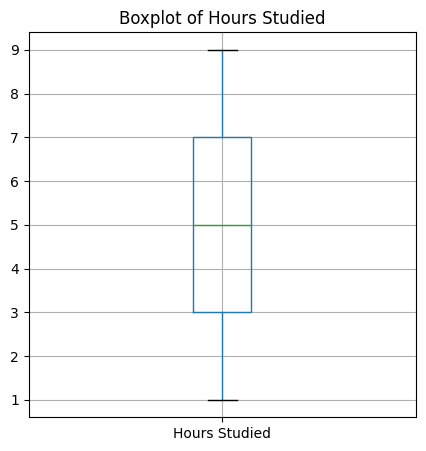

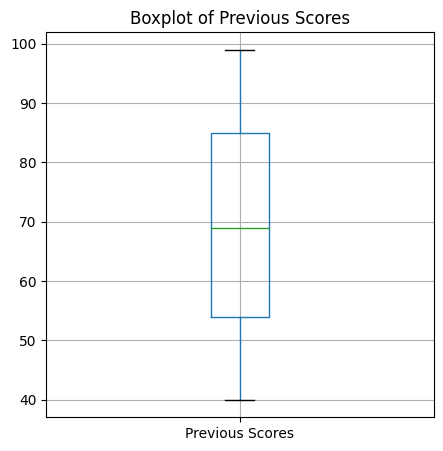

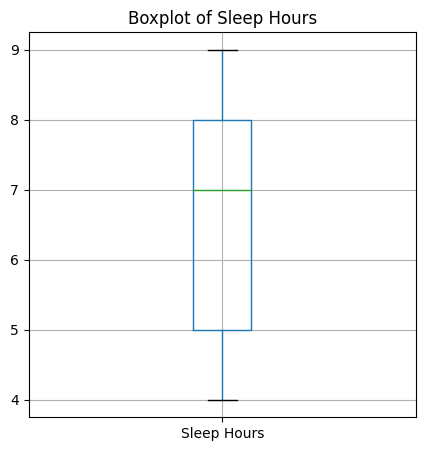

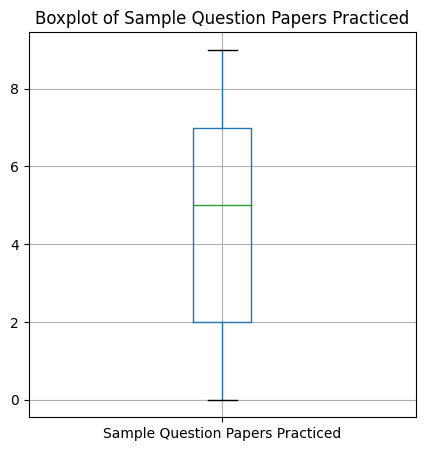

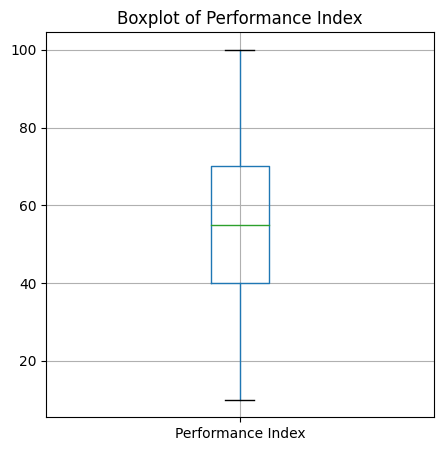

In [31]:
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Boxplot of {col}')
    bp=data.boxplot(column=col)
    plt.show()
    plt.close(fig)

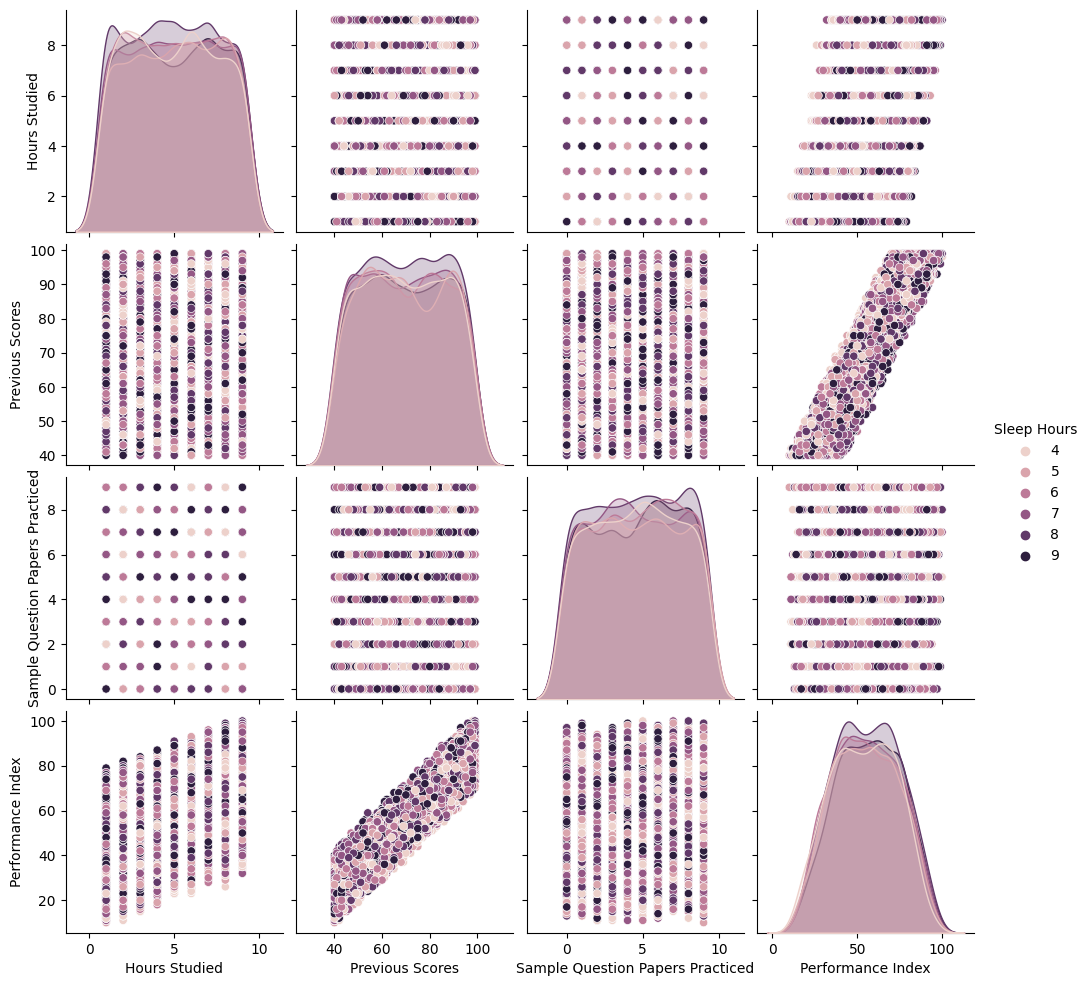

In [34]:
sns.pairplot(data,hue="Sleep Hours")

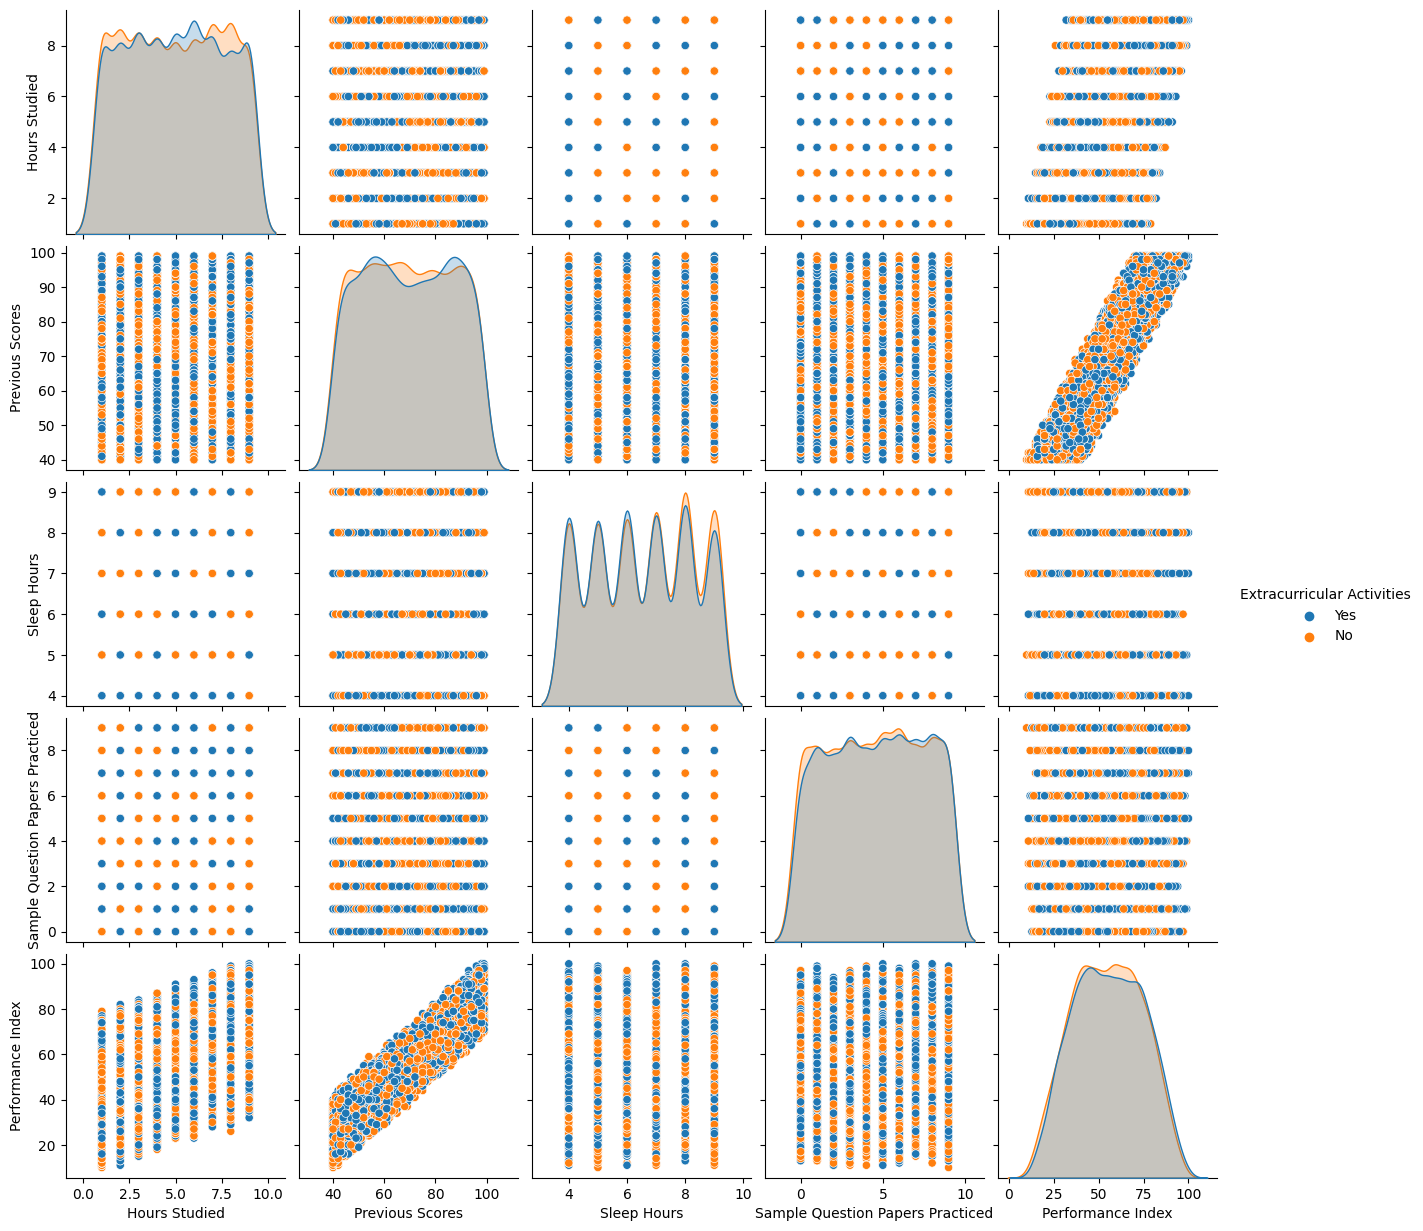

In [35]:
sns.pairplot(data,hue="Extracurricular Activities")

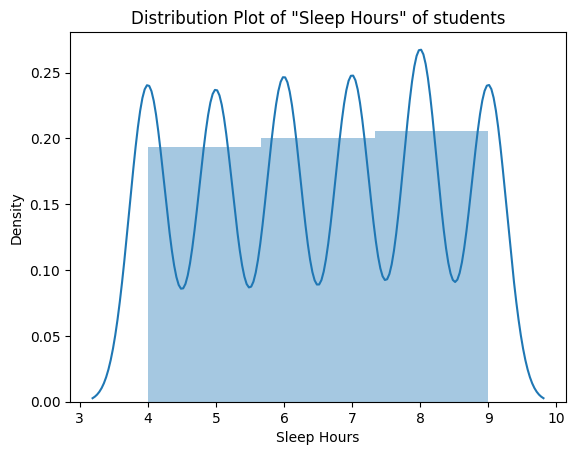

In [40]:
sns.distplot(data["Sleep Hours"], kde=True, bins=3)
plt.title('Distribution Plot of "Sleep Hours" of students')
plt.show()

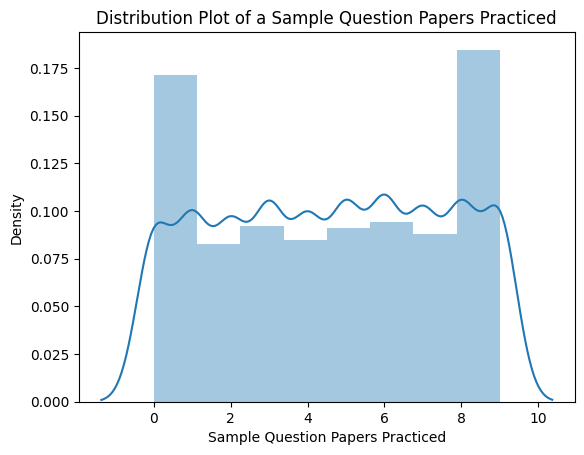

In [6]:
sns.distplot(data['Sample Question Papers Practiced'], kde=True, bins=)
plt.title('Distribution Plot of a Sample Question Papers Practiced')
plt.show()

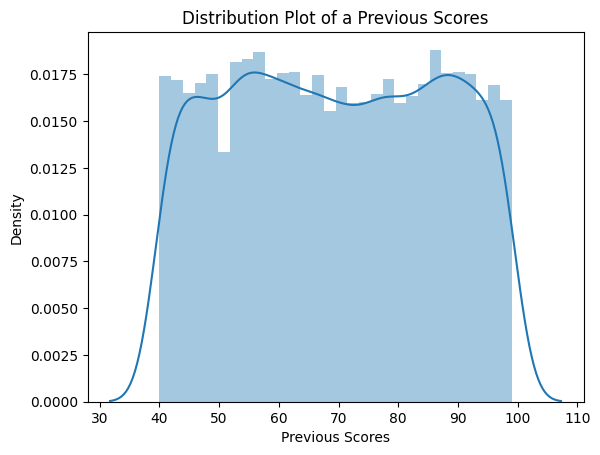

In [11]:
sns.distplot(data['Previous Scores'], kde=True, bins=30)
plt.title('Distribution Plot of a Previous Scores')
plt.show()

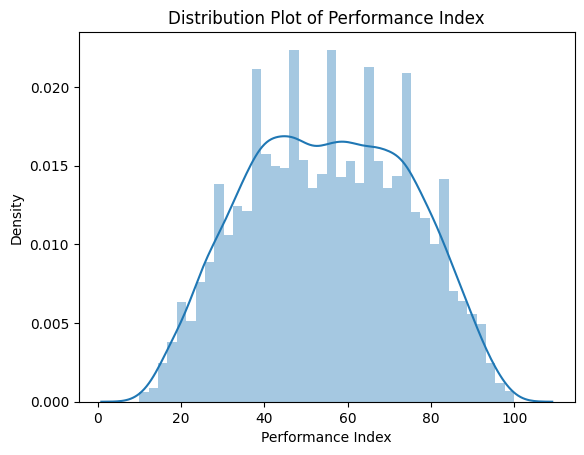

In [16]:
sns.distplot(data["Performance Index"], kde=True, bins=40)
plt.title('Distribution Plot of Performance Index')
plt.show()

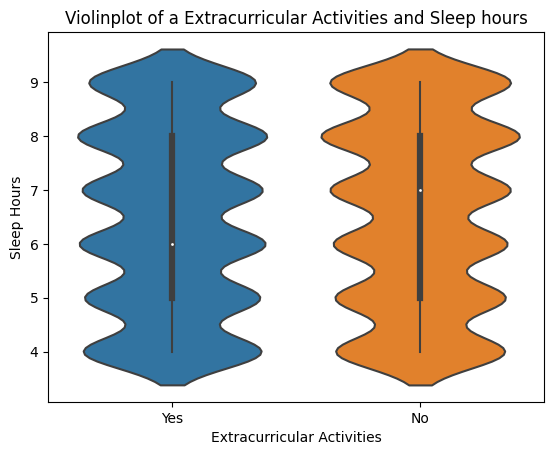

In [20]:
sns.violinplot(x='Extracurricular Activities', y="Sleep Hours", data=data)
plt.title('Violinplot of a Extracurricular Activities and Sleep hours')
plt.show()


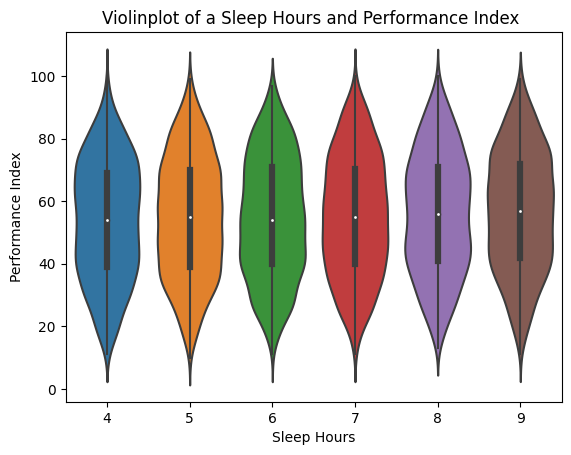

In [21]:
sns.violinplot(x="Sleep Hours", y='Performance Index', data=data)
plt.title('Violinplot of a Sleep Hours and Performance Index ')
plt.show()

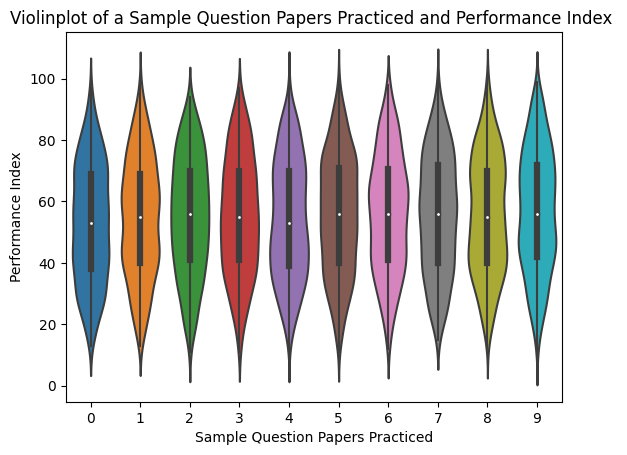

In [22]:
sns.violinplot(x="Sample Question Papers Practiced", y='Performance Index', data=data)
plt.title('Violinplot of a Sample Question Papers Practiced and Performance Index ')
plt.show()

# **Preprocessing Operations :**

In [40]:
#Get dummies encoding
Get_Dumm=["Extracurricular Activities"]

for col in Get_Dumm :
    Encoded_with_getdummies=pd.get_dummies(data[col],drop_first=False,dtype="int")
    data=pd.concat([data,Encoded_with_getdummies],axis=1)
    data.drop(col,axis=1,inplace=True)

In [41]:
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


# **Splitting data into features and goal groups :**

In [48]:
Features=data.drop(columns="Performance Index",axis=1)
Goal=data["Performance Index"]

In [49]:
Features

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
0,7,99,9,1,0,1
1,4,82,4,2,1,0
2,8,51,7,2,0,1
3,5,52,5,2,0,1
4,7,75,8,5,1,0
...,...,...,...,...,...,...
9995,1,49,4,2,0,1
9996,7,64,8,5,0,1
9997,6,83,8,5,0,1
9998,9,97,7,0,0,1


In [50]:
Goal

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [51]:
f_train,f_test,g_train,g_test=train_test_split(Features,Goal,test_size=0.2,random_state=10)

# **Applying GridSearch Model to find the best parameters :**

## **On The Linear regression Model :**

In [52]:
LR=LinearRegression()
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}


grid_search = GridSearchCV(LR, parameters, cv=5)
grid_search.fit(f_train, g_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.9888551615605069


In [53]:
LR=LinearRegression(fit_intercept=True,copy_X=True,positive=True)
LR.fit(f_train,g_train)
predicted=LR.predict(f_test)

In [54]:
predicted

array([75.95961937, 55.91089324, 71.64929764, ..., 19.68061203,
       49.1175591 , 84.48333367])

# **Evaluate Linear regression model :**

In [55]:
R2Score=r2_score(g_test, predicted)

In [80]:
R2Score*100

98.77782823407964

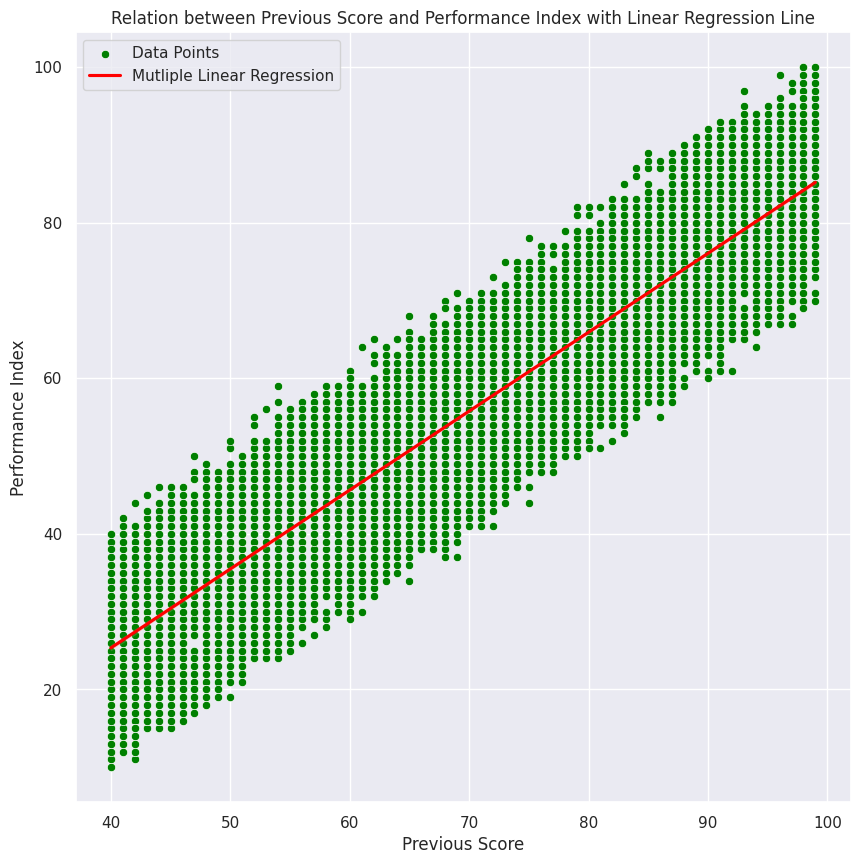

In [68]:
prev_score = data['Previous Scores']
per = data['Performance Index']
plt.figure(figsize=(10, 10))
sns.scatterplot(x=prev_score, y=per, color='green', label='Data Points')
sns.regplot(x=prev_score, y=per, scatter=False, color='red', label='Mutliple Linear Regression')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Relation between Previous Score and Performance Index with Linear Regression Line')
plt.legend()
plt.show()

# **Using polynomial Regression :**

In [79]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(f_train)
poly_reg =LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}

# Perform grid search
grid_search = GridSearchCV(poly_reg, param_grid, cv=5)
grid_search.fit(X_poly, g_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print( best_params)
print( best_score*100)

{'copy_X': True, 'fit_intercept': True, 'positive': True}
98.88347954727189


In [78]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(f_train)
poly_reg2 =LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}

# Perform grid search
grid_search = GridSearchCV(poly_reg2, param_grid, cv=5)
grid_search.fit(X_poly, g_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print( best_params)
print( best_score*100)

{'copy_X': True, 'fit_intercept': True, 'positive': True}
98.8826427452562


# **Choosing the final model we will use :**
#### [ Polynomial regression with 2 degrees ]

In [85]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
f_poly = poly_features.fit_transform(f_train)
f_testPoly= poly_features.fit_transform(f_test)
poly_reg =LinearRegression(copy_X=True,fit_intercept=True,positive=True)
poly_reg.fit(f_poly, g_train)
predicted_fromPoly2Deg=poly_reg.predict(f_testPoly)
R2Score=r2_score(g_test, predicted_fromPoly2Deg)
print(R2Score*100)

98.7779103715551


# **Saving the model :**

In [86]:
joblib.dump(poly_reg,"PolyRegressionModel-GDSC Task.sav")

['PolyRegressionModel-GDSC Task.sav']